# An Analysis and Recommendation of Better Places to Live in Boston

### Importing all the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import json # library to handle JSON files

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# import k-means from clustering stage
from sklearn.cluster import KMeans

import matplotlib.cm as cm
import matplotlib.colors as colors

In [2]:
# Importing map rendering Folium library as we will be working with maps
!conda install -c conda-forge folium=0.5.0 --yes
import folium

Solving environment: done

# All requested packages already installed.



## 1. Analysing the 1st criteria (District with more number of Special Schools)

Reading Boston's schools' database. The source for the database is: https://www.kaggle.com/crawford/boston-public-schools

In [3]:
# The code was removed by Watson Studio for sharing.

,X,Y,OBJECTID_1,OBJECTID,BLDG_ID,BLDG_NAME,ADDRESS,CITY,ZIPCODE,CSP_SCH_ID,...,SCH_NAME,SCH_LABEL,SCH_TYPE,SHARED,COMPLEX,Label,TLT,PL,POINT_X,POINT_Y
0,-71.004121,42.388799,1,1,1,Guild Bldg,195 Leyden Street,East Boston,2128,4061,...,Guild Elementary,Guild,ES,,,52,3,Grace,790128.1527,2967094.378
1,-71.030480,42.378545,2,2,3,"Kennedy, P Bldg",343 Saratoga Street,East Boston,2128,4541,...,Kennedy Patrick Elem,PJ Kennedy,ES,,,72,3,Grace,783027.7458,2963317.534
2,-71.033891,42.375279,3,3,4,Otis Bldg,218 Marion Street,East Boston,2128,4322,...,Otis Elementary,Otis,ES,,,106,3,Grace,782112.8239,2962122.057
3,-71.038011,42.378089,4,4,6,Odonnell Bldg,33 Trenton Street,East Boston,2128,4543,...,O'Donnell Elementary,O'Donnell,ES,,,103,3,Grace,780994.0000,2963140.000
4,-71.034921,42.380957,5,5,7,East Boston High Bldg,86 White Street,East Boston,2128,1070,...,East Boston High,East Boston HS,HS,,,36,2,Joel,781823.0000,2964190.000


Let us find the number of entries in the dataset.

In [4]:
schools_df.shape

(131, 21)

In [5]:
schools_df.columns

Index(['X', 'Y', 'OBJECTID_1', 'OBJECTID', 'BLDG_ID', 'BLDG_NAME', 'ADDRESS',
       'CITY', 'ZIPCODE', 'CSP_SCH_ID', 'SCH_ID', 'SCH_NAME', 'SCH_LABEL',
       'SCH_TYPE', 'SHARED', 'COMPLEX', 'Label', 'TLT', 'PL', 'POINT_X',
       'POINT_Y'],
      dtype='object')

Now we are going to pre-process the Boston Public schools dataset.

In [6]:
# Pre processing the schools_df dataset
# Some of the schools have not been categorized and instead marked with some date in the SCH_TYPE column.
# So we are replacing those columns with Numpy NaN and then dropping the row.

schools_df['SCH_TYPE'].replace('6/7/2012', np.nan, inplace=True)
schools_df.dropna(axis=0, inplace=True)

In [7]:
schools_df.shape

(124, 21)

In [8]:
# Now we are going to group the schools by City and then by school type

df_schools_type = schools_df[['CITY', 'SCH_TYPE','SCH_NAME' ]]
new_schools_df = df_schools_type.groupby(['CITY', 'SCH_TYPE'],as_index=False).count()
new_schools_df

,CITY,SCH_TYPE,SCH_NAME
0,Allston,K-8,2
1,Allston,Special,1
2,Boston,ES,1
3,Boston,HS,2
4,Boston,K-12,2
5,Boston,K-8,3
6,Boston,Special,5
7,Brighton,ELC,1
8,Brighton,ES,1
9,Brighton,HS,1


In [9]:
schools_type = df_schools_type.groupby(['CITY', 'SCH_TYPE']).count()
schools_type.rename(columns= {'SCH_NAME':'COUNT'}, inplace = True)
schools_type

COUNT
CITY          SCH_TYPE       
Allston       K-8           2
              Special       1
Boston        ES            1
              HS            2
              K-12          2
              K-8           3
              Special       5
Brighton      ELC           1
              ES            1
              HS            1
              K-12          2
              K-8           1
Charlestown   ES            1
              HS            1
              K-8           1
              MS            1
Dorchester    ES           11
              HS            3
              K-12          2
              K-8           6
              MS            2
              Special       2
East Boston   ELC           1
              ES            7
              HS            1
              K-8           2
Hyde Park     ES            2
              HS            2
              K-8           2
Jamaica Plain ELC           1
              ES            2
              HS            3
              K-8           5
              Special       1
Mattapan      ELC           1
              ES            3
              K-8           2
Roslindale    ES            5
              K-8           1
              MS            1
Roxbury       ELC           1
              ES            6
              HS            3
              K-8           4
              MS            1
              Special       2
South Boston  ES            2
              HS            1
              K-8           2
              MS            1
West Roxbury  ES            1
              HS            2
              K-8           4

In [10]:
# Converting this dataframe into pivot table so that we could prepare a heatmap
grouped_pivot = new_schools_df.pivot(index='CITY',columns='SCH_TYPE')
grouped_pivot = grouped_pivot.fillna(0) #fill missing values with 0
grouped_pivot

SCH_NAME                                  
SCH_TYPE           ELC    ES   HS K-12  K-8   MS Special
CITY                                                    
Allston            0.0   0.0  0.0  0.0  2.0  0.0     1.0
Boston             0.0   1.0  2.0  2.0  3.0  0.0     5.0
Brighton           1.0   1.0  1.0  2.0  1.0  0.0     0.0
Charlestown        0.0   1.0  1.0  0.0  1.0  1.0     0.0
Dorchester         0.0  11.0  3.0  2.0  6.0  2.0     2.0
East Boston        1.0   7.0  1.0  0.0  2.0  0.0     0.0
Hyde Park          0.0   2.0  2.0  0.0  2.0  0.0     0.0
Jamaica Plain      1.0   2.0  3.0  0.0  5.0  0.0     1.0
Mattapan           1.0   3.0  0.0  0.0  2.0  0.0     0.0
Roslindale         0.0   5.0  0.0  0.0  1.0  1.0     0.0
Roxbury            1.0   6.0  3.0  0.0  4.0  1.0     2.0
South Boston       0.0   2.0  1.0  0.0  2.0  1.0     0.0
West Roxbury       0.0   1.0  2.0  0.0  4.0  0.0     0.0

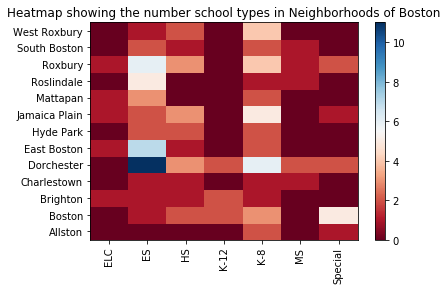

In [11]:
#use the grouped results
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)
plt.title('Heatmap showing the number school types in Neighborhoods of Boston')
fig.colorbar(im)
plt.show()

The above heatmap shows that there are more number of Elementary Schools of about 10 in Dorchester and about 7 in east Boston. In rest of the Boston neighborhoods, there are 0-5 number of different types of schools. Since we are looking for special schools, some neighborhood has special schools, not all of them. The highest number of special school is 5, which are located at Boston( Central Boston).

Let's visualize the number of different types of schools using a bar chart.

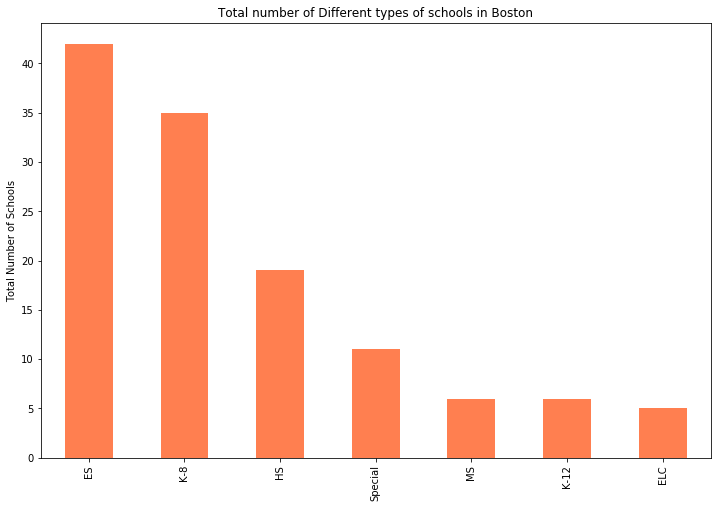

In [12]:
#Let's visualize the number of different types of schools using a bar chart.

schools_type = df_schools_type['SCH_TYPE'].value_counts().to_frame()
schools_type['SCH_TYPE'].plot(kind ='bar', figsize =(12,8), color = 'coral')
plt.title('Total number of Different types of schools in Boston')
plt.ylabel('Total Number of Schools')
plt.show()

## 2. Analyzing the crime rate in Boston

For the crime rate analysins in Boston, the dataset: https://www.kaggle.com/ankkur13/boston-crime-data has been used.

Reading the excel data containing the List of Boston Police Districts (BPDs), the Neighborhoods served under each police district, the latitude and longitude of each BPD and each Neighborhoods. These data are are entered manually in an excel sheet. 

In [13]:

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about your possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/
streaming_body_1 = client_6f893797fd974459a994bf9df8712618.get_object(Bucket='applieddatasciencecapstoneproject-donotdelete-pr-ppv8efyhqezwdx', Key='Boston Neighborhoods.xlsx')['Body']
# add missing __iter__ method so pandas accepts body as file-like object
if not hasattr(streaming_body_1, "__iter__"): streaming_body_1.__iter__ = types.MethodType( __iter__, streaming_body_1 ) 

LL_df = pd.read_excel(streaming_body_1)
LL_df.head()

,Neighborhood,NeighLatitude,NeighLongitude,PDistrict,PDName,PDSt Adress,PDCity,State,PDZipcode,PDLatitude,PDLongitude
0,Allston,42.351139,-71.131439,D14,Brighton,301 Washington Street,Brighton,MA,2135,42.349390,-71.150550
1,Back Bay,42.350150,-71.065190,D4,South End,650 Harrison Avenue,Boston,MA,2116,42.349854,-71.073363
2,Bay Village,42.320610,-72.664220,A1,Downtown,40 New Sudbury Street,Boston,MA,2114,42.361837,-71.060311
3,Beacon Hill,42.365530,-71.060880,A1,Downtown,40 New Sudbury Street,Boston,MA,2114,42.361837,-71.060311
4,Brighton,42.345798,-71.151253,D14,Brighton,301 Washington Street,Brighton,MA,2135,42.349390,-71.150550


Reading the dataset https://www.kaggle.com/ankkur13/boston-crime-data for th crime data.

In [14]:

body = client_6f893797fd974459a994bf9df8712618.get_object(Bucket='applieddatasciencecapstoneproject-donotdelete-pr-ppv8efyhqezwdx',Key='crime.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

# Let's read the crime csv in a panda dataframe

crime_df = pd.read_csv(body, encoding ='latin1')
crime_df.head()


/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182080058,2403,Disorderly Conduct,DISTURBING THE PEACE,E18,495,NaN,2018,10,Wednesday,20,Part Two,ARLINGTON ST,42.262608,-71.121186,"(42.26260773, -71.12118637)"
1,I182080053,3201,Property Lost,PROPERTY - LOST,D14,795,NaN,2018,8,Thursday,20,Part Three,ALLSTON ST,42.352111,-71.135311,"(42.35211146, -71.13531147)"
2,I182080052,2647,Other,THREATS TO DO BODILY HARM,B2,329,NaN,2018,10,Wednesday,19,Part Two,DEVON ST,42.308126,-71.076930,"(42.30812619, -71.07692974)"
3,I182080051,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,A1,92,NaN,2018,10,Wednesday,20,Part One,CAMBRIDGE ST,42.359454,-71.059648,"(42.35945371, -71.05964817)"
4,I182080050,3122,Aircraft,AIRCRAFT INCIDENTS,A7,36,NaN,2018,10,Wednesday,20,Part Three,PRESCOTT ST,42.375258,-71.024663,"(42.37525782, -71.02466343)"


In [15]:
#Let's look at the size of the dataframe
crime_df.shape

(327820, 16)

Let us group the crime along the reported Police District.

In [16]:
df_district = crime_df.groupby('DISTRICT', axis=0).count()
new_df = pd.DataFrame({'Count': df_district['INCIDENT_NUMBER']})


Let us plot the crime recorded in different Police District in a bar chart

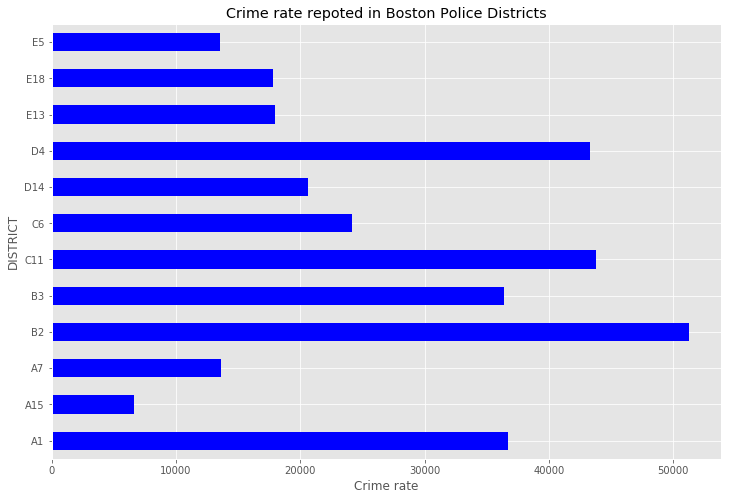

In [17]:
# Plot showing the crime recorded in Boston Police Districts.
plt.style.use('ggplot')

new_df['Count'].plot(kind ='barh', figsize =(12,8), color = 'blue')
plt.xlabel('Crime rate')
plt.title('Crime rate repoted in Boston Police Districts')
plt.show()

In [18]:
new_df.reset_index(inplace = True)
new_df

,DISTRICT,Count
0,A1,36735
1,A15,6663
2,A7,13634
3,B2,51288
4,B3,36400
5,C11,43817
6,C6,24190
7,D14,20632
8,D4,43338
9,E13,17981


Let us visualise the crime recorded in different Police Districts in a Folium's choropleth map. In order to create a Choropleth map, we need a GeoJSON file that defines the areas/boundaries of the state that we are interested in. The GeoJSON file can be found at:https://data.boston.gov/dataset/police-districts . For our ease I have downloaded the JSON file in my dropbox folder and included the shareable link here.

In [19]:
# Downloading the file in our folder
!wget --quiet https://www.dropbox.com/s/deu91q6riduc6bh/Boston_PD.json?dl=0 -O BostonPD.json

In [20]:
BostonPD = r'BostonPD.json'

In [21]:
# generate choropleth map using the total crimes in Boston
# Boston latitude and longitude values
Boston_latitude = 42.3601
Boston_longitude = -71.0589

boston_map = folium.Map(location=[Boston_latitude, Boston_longitude], zoom_start=11)
boston_map.choropleth(
    geo_data=BostonPD,
    data=new_df,
    columns=['DISTRICT', 'Count'],
    key_on='feature.properties.ID',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.5,
    legend_name='Crime Rates in Boston'
 )
boston_map

Adding markers on top of choropleth map. In the map below, blue markers represents the BPDs location while the green markers represent the location of Special schools in Boston.

In [22]:
# Add markers to map on top of the choropleth
# Adding special schools location on to the map

for lat, lng, name, sch_type in zip(schools_df['Y'], schools_df['X'], schools_df['SCH_NAME'], schools_df['SCH_TYPE']):
    if sch_type == 'Special':
        label = '{}, {}'.format(name, sch_type)
        label = folium.Popup(label, parse_html=True)
        folium.CircleMarker(
            [lat, lng],
            radius=5,
            popup=label,
            color='green',
            fill=True,
            fill_color='#3186cc',
            fill_opacity=0.7,
            parse_html=False).add_to(boston_map)  
        
# Adding the pop-up marker for the Boston Police Districts.

# instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()

# loop through the PDistricts and add each to the feature group
for lat, lng, in zip(LL_df.PDLatitude, LL_df.PDLongitude):
    incidents.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='blue',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )
# add pop-up text(District's name) to each marker on the map
latitudes = list(LL_df.PDLatitude)
longitudes = list(LL_df.PDLongitude)
labels = list(LL_df.PDistrict)

for lat, lng, label in zip(latitudes, longitudes, labels):
    folium.Marker([lat, lng], popup=label).add_to(boston_map)


# add Neighborhood to map
boston_map.add_child(incidents)

## 3. Exploring the neighborhoods in Boston.

### Segmenting and Clustering Neighborhoods in Boston city using Foursquare API

#### Define Foursquare Credentials and Version

In [23]:
# The code was removed by Watson Studio for sharing.

#### Let's explore the neighborhoods of Boston city.
Let's create a funtion to explore every neighborhoods in turn.

In [24]:
def getNearbyVenues(names, latitudes, longitudes, radius=500, LIMIT=100):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        #print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

Now write the code to run the above function on each neighborhood and create a new dataframe called Boston_venues.

In [25]:
Boston_venues = getNearbyVenues(names=LL_df['Neighborhood'],
                                   latitudes=LL_df['NeighLatitude'],
                                   longitudes=LL_df['NeighLongitude']
                                  )

Let's check the size of the resulting dataframe

In [26]:
print(Boston_venues.shape)
Boston_venues.head()

(858, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Allston,42.351139,-71.131439,Great Scott,42.350231,-71.130822,Rock Club
1,Allston,42.351139,-71.131439,Mala Restaurant,42.352960,-71.131033,Chinese Restaurant
2,Allston,42.351139,-71.131439,Tous les Jours,42.351753,-71.131665,Bakery
3,Allston,42.351139,-71.131439,BonChon Chicken,42.353105,-71.130921,Fried Chicken Joint
4,Allston,42.351139,-71.131439,Punjab Palace,42.352839,-71.130520,Indian Restaurant


Let's check how many venues were returned for each neighborhood

In [27]:
Boston_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Allston,68,68,68,68,68,68
Back Bay,100,100,100,100,100,100
Bay Village,4,4,4,4,4,4
Beacon Hill,82,82,82,82,82,82
Brighton,26,26,26,26,26,26
Charlestown,19,19,19,19,19,19
Chinatown,30,30,30,30,30,30
Dorchester,9,9,9,9,9,9
Downtown Boston,100,100,100,100,100,100


Let's find out how many unique categories can be curated from all the returned venues

In [28]:
print('There are {} uniques categories.'.format(len(Boston_venues['Venue Category'].unique())))

There are 176 uniques categories.


Let's analyze each neighborhood making each category as a separate column in the dataframe

In [29]:
# one hot encoding
Boston_venues_categorized = pd.get_dummies(Boston_venues[['Venue Category']], prefix="", prefix_sep="")

Boston_venues_categorized.columns

Index(['ATM', 'African Restaurant', 'American Restaurant', 'Art Gallery',
       'Art Museum', 'Arts & Crafts Store', 'Asian Restaurant', 'BBQ Joint',
       'Bagel Shop', 'Bakery',
       ...
       'Tour Provider', 'Track', 'Trail', 'Train Station',
       'Vegetarian / Vegan Restaurant', 'Vietnamese Restaurant', 'Wine Bar',
       'Wine Shop', 'Yoga Studio', 'Zoo Exhibit'],
      dtype='object', length=176)

In [30]:
Boston_venues_categorized['Neighborhood']= Boston_venues['Neighborhood']
Boston_venues_categorized.set_index('Neighborhood', inplace= True)
Boston_venues_categorized.head()

,ATM,African Restaurant,American Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,BBQ Joint,Bagel Shop,Bakery,...,Tour Provider,Track,Trail,Train Station,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wine Bar,Wine Shop,Yoga Studio,Zoo Exhibit
Neighborhood,,,,,,,,,,,,,,,,,,,,,
Allston,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Allston,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Allston,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
Allston,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Allston,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
Boston_venues_categorized.reset_index(inplace = True)
Boston_venues_categorized.head()

,Neighborhood,ATM,African Restaurant,American Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,BBQ Joint,Bagel Shop,...,Tour Provider,Track,Trail,Train Station,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wine Bar,Wine Shop,Yoga Studio,Zoo Exhibit
0,Allston,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Allston,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Allston,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Allston,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Allston,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [32]:
Boston_grouped = Boston_venues_categorized.groupby('Neighborhood').mean().reset_index()
Boston_grouped

,Neighborhood,ATM,African Restaurant,American Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,BBQ Joint,Bagel Shop,...,Tour Provider,Track,Trail,Train Station,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wine Bar,Wine Shop,Yoga Studio,Zoo Exhibit
0,Allston,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.014706,0.000000,0.000000,...,0.000000,0.000000,0.00,0.0000,0.000000,0.014706,0.000000,0.000000,0.014706,0.000000
1,Back Bay,0.000000,0.000000,0.010000,0.000000,0.00,0.00,0.060000,0.000000,0.000000,...,0.000000,0.000000,0.00,0.0000,0.020000,0.020000,0.000000,0.010000,0.000000,0.000000
2,Bay Village,0.000000,0.000000,0.000000,0.000000,0.00,0.25,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,Beacon Hill,0.000000,0.000000,0.012195,0.000000,0.00,0.00,0.000000,0.012195,0.012195,...,0.000000,0.000000,0.00,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,Brighton,0.000000,0.000000,0.038462,0.000000,0.00,0.00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00,0.0000,0.000000,0.000000,0.000000,0.038462,0.000000,0.000000
5,Charlestown,0.000000,0.000000,0.052632,0.000000,0.00,0.00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,Chinatown,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.100000,0.000000,0.000000,...,0.000000,0.000000,0.00,0.0000,0.000000,0.000000,0.033333,0.000000,0.000000,0.000000
7,Dorchester,0.000000,0.000000,0.000000,0.111111,0.00,0.00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00,0.0000,0.111111,0.000000,0.000000,0.000000,0.111111,0.000000
8,Downtown Boston,0.000000,0.000000,0.040000,0.000000,0.01,0.00,0.010000,0.000000,0.000000,...,0.000000,0.000000,0.00,0.0000,0.010000,0.000000,0.020000,0.020000,0.000000,0.000000
9,East Boston,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [33]:
Boston_grouped.shape

(22, 176)

Let's print each neighborhood along with the top 5 most common venues

In [34]:
num_top_venues = 5

for hood in Boston_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = Boston_grouped[Boston_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Allston----
                venue  freq
0   Korean Restaurant  0.06
1  Chinese Restaurant  0.06
2         Pizza Place  0.04
3              Bakery  0.04
4           Rock Club  0.03


----Back Bay----
                venue  freq
0  Chinese Restaurant  0.12
1    Asian Restaurant  0.06
2              Bakery  0.06
3             Theater  0.05
4  Seafood Restaurant  0.04


----Bay Village----
                 venue  freq
0       Nightlife Spot  0.25
1  Arts & Crafts Store  0.25
2                  Bar  0.25
3              Brewery  0.25
4                  ATM  0.00


----Beacon Hill----
                venue  freq
0  Italian Restaurant  0.16
1         Pizza Place  0.09
2              Bakery  0.05
3         Coffee Shop  0.05
4          Donut Shop  0.05


----Brighton----
         venue  freq
0          Pub  0.12
1  Pizza Place  0.08
2  Coffee Shop  0.08
3       Bakery  0.08
4         Café  0.08


----Charlestown----
                venue  freq
0         Coffee Shop  0.11
1   Convenience Stor

Let's put that into a pandas dataframe First, let's write a function to sort the venues in descending order.

In [35]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe and display the top 10 venues for each neighborhood.

In [36]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = Boston_grouped['Neighborhood']

for ind in np.arange(Boston_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Boston_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Allston,Korean Restaurant,Chinese Restaurant,Pizza Place,Bakery,Mexican Restaurant,Spa,Rock Club,Bar,Italian Restaurant,Thai Restaurant
1,Back Bay,Chinese Restaurant,Bakery,Asian Restaurant,Theater,Seafood Restaurant,Italian Restaurant,Performing Arts Venue,Sushi Restaurant,Hotel,Hotel Bar
2,Bay Village,Brewery,Bar,Arts & Crafts Store,Nightlife Spot,Food Truck,Food & Drink Shop,Fish Market,Fast Food Restaurant,Farmers Market,Falafel Restaurant
3,Beacon Hill,Italian Restaurant,Pizza Place,Bakery,Donut Shop,Coffee Shop,Sandwich Place,Hotel,Park,Mediterranean Restaurant,Market
4,Brighton,Pub,Bakery,Coffee Shop,Pizza Place,Café,Bank,Donut Shop,Dessert Shop,Sushi Restaurant,Greek Restaurant


#### Clustering Neighborhood with K-Mean Clustering

In [37]:
# set number of clusters
kclusters =4

Boston_grouped_clustering = Boston_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Boston_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 0, 2, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [38]:
Boston_merged= LL_df[['Neighborhood','NeighLatitude','NeighLongitude']]

# add clustering labels. use try statement in case I have done this before.

try:
    neighborhoods_venues_sorted.drop(['Cluster Labels'], axis=1, inplace=True)
except:
    pass

neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
Boston_merged = Boston_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

Boston_merged.head() # check the last columns!

,Neighborhood,NeighLatitude,NeighLongitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Allston,42.351139,-71.131439,0,Korean Restaurant,Chinese Restaurant,Pizza Place,Bakery,Mexican Restaurant,Spa,Rock Club,Bar,Italian Restaurant,Thai Restaurant
1,Back Bay,42.350150,-71.065190,0,Chinese Restaurant,Bakery,Asian Restaurant,Theater,Seafood Restaurant,Italian Restaurant,Performing Arts Venue,Sushi Restaurant,Hotel,Hotel Bar
2,Bay Village,42.320610,-72.664220,2,Brewery,Bar,Arts & Crafts Store,Nightlife Spot,Food Truck,Food & Drink Shop,Fish Market,Fast Food Restaurant,Farmers Market,Falafel Restaurant
3,Beacon Hill,42.365530,-71.060880,0,Italian Restaurant,Pizza Place,Bakery,Donut Shop,Coffee Shop,Sandwich Place,Hotel,Park,Mediterranean Restaurant,Market
4,Brighton,42.345798,-71.151253,0,Pub,Bakery,Coffee Shop,Pizza Place,Café,Bank,Donut Shop,Dessert Shop,Sushi Restaurant,Greek Restaurant


In [39]:
Boston_merged[Boston_merged['Cluster Labels']==0]

,Neighborhood,NeighLatitude,NeighLongitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Allston,42.351139,-71.131439,0,Korean Restaurant,Chinese Restaurant,Pizza Place,Bakery,Mexican Restaurant,Spa,Rock Club,Bar,Italian Restaurant,Thai Restaurant
1,Back Bay,42.350150,-71.065190,0,Chinese Restaurant,Bakery,Asian Restaurant,Theater,Seafood Restaurant,Italian Restaurant,Performing Arts Venue,Sushi Restaurant,Hotel,Hotel Bar
3,Beacon Hill,42.365530,-71.060880,0,Italian Restaurant,Pizza Place,Bakery,Donut Shop,Coffee Shop,Sandwich Place,Hotel,Park,Mediterranean Restaurant,Market
4,Brighton,42.345798,-71.151253,0,Pub,Bakery,Coffee Shop,Pizza Place,Café,Bank,Donut Shop,Dessert Shop,Sushi Restaurant,Greek Restaurant
5,Charlestown,42.377762,-71.067322,0,Convenience Store,Coffee Shop,Italian Restaurant,Pharmacy,Pizza Place,Pool,Chinese Restaurant,Donut Shop,Café,Shopping Mall
6,Chinatown,42.347960,-71.056410,0,Coffee Shop,Sandwich Place,Asian Restaurant,Dim Sum Restaurant,Food Truck,Bakery,Sushi Restaurant,Bubble Tea Shop,Mexican Restaurant,Boxing Gym
7,Dorchester,42.299780,-71.078840,0,Pizza Place,Southern / Soul Food Restaurant,Yoga Studio,Art Gallery,Vegetarian / Vegan Restaurant,Plaza,Liquor Store,Golf Course,Dog Run,Farmers Market
8,Downtown Boston,42.355301,-71.055283,0,Sandwich Place,Coffee Shop,Park,Italian Restaurant,American Restaurant,Hotel,Salad Place,Steakhouse,Sushi Restaurant,Historic Site
9,East Boston,42.417358,-71.039482,0,Smoke Shop,Donut Shop,Pizza Place,Food & Drink Shop,Bakery,Bar,Fish Market,Fast Food Restaurant,Farmers Market,Falafel Restaurant
10,Fenway Kenmore,42.345480,-71.101700,0,American Restaurant,Lounge,Pizza Place,Sports Bar,Restaurant,Mexican Restaurant,Bakery,Thai Restaurant,Hotel,Cosmetics Shop


In [40]:
Boston_merged[Boston_merged['Cluster Labels']==1]

,Neighborhood,NeighLatitude,NeighLongitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
12,Jamaica Plain,42.31088,-71.12506,1,Bike Trail,Zoo Exhibit,French Restaurant,Food & Drink Shop,Fish Market,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Event Space,Electronics Store


In [41]:
Boston_merged[Boston_merged['Cluster Labels']==2]

,Neighborhood,NeighLatitude,NeighLongitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Bay Village,42.32061,-72.66422,2,Brewery,Bar,Arts & Crafts Store,Nightlife Spot,Food Truck,Food & Drink Shop,Fish Market,Fast Food Restaurant,Farmers Market,Falafel Restaurant


In [59]:
Boston_merged[Boston_merged['Cluster Labels']==3]

,Neighborhood,NeighLatitude,NeighLongitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue
13,Mattapan,42.27277,-71.08705,3,Art Gallery,Home Service,Trail,Business Service,Zoo Exhibit,Dumpling Restaurant,Food & Drink Shop


#### Finally, let's visualize the resulting clusters
Utilizing the geojson data of Boston neighborhoods as from: https://data.boston.gov/dataset/boston-neighborhoods

In [60]:
!wget --quiet https://www.dropbox.com/s/7bvmchz8b7ykf47/Boston_Neighborhood.json?dl=0 -O Boston_Neighborhood.json

In [61]:
# generate choropleth map using the venues cluster in Boston

Boston_latitude = 42.3601
Boston_longitude = -71.0589

BostonNeigh_geo =r'Boston_Neighborhood.json'


boston_map = folium.Map(location=[Boston_latitude, Boston_longitude], zoom_start=11)
boston_map.choropleth(
    geo_data=BostonNeigh_geo,
    data=Boston_merged,
    columns=['Neighborhood', 'Cluster Labels'],
    key_on='feature.properties.Name',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.5,
    legend_name='Venue Clusters in Boston'
 )
# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# adding markers  of clusters to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Boston_merged['NeighLatitude'], Boston_merged['NeighLongitude'], Boston_merged['Neighborhood'], Boston_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(boston_map)
       
boston_map


In [62]:
# Create an ordered list of venues from a dataframe
def list_venue(df_n, cluster):
    df_place = df_n.loc[df_n['Cluster Labels'] == cluster, df_n.columns[[1] + list(range(5, df_n.shape[1]))]]
    df_list = df_place.melt().groupby('value').count().sort_values(by=['variable'], ascending=False)
    column_list = ['Venue Type','Count']
    df_list.reset_index(inplace=True)
    df_list.columns = column_list
    return df_list.head(7)



In [63]:
list_venue(neighborhoods_venues_sorted,0)

,Venue Type,Count
0,Pizza Place,5
1,Bakery,5
2,Liquor Store,5
3,Coffee Shop,5
4,Park,4
5,Donut Shop,3
6,Hotel,3


In [64]:
list_venue(neighborhoods_venues_sorted,1)

,Venue Type,Count
0,Farmers Market,1
1,Fast Food Restaurant,1
2,Fish Market,1
3,Food & Drink Shop,1
4,Jamaica Plain,1


In [65]:
list_venue(neighborhoods_venues_sorted,2)

,Venue Type,Count
0,Bay Village,1
1,Fish Market,1
2,Food & Drink Shop,1
3,Food Truck,1
4,Nightlife Spot,1


In [52]:
list_venue(neighborhoods_venues_sorted,3)

,Venue Type,Count
0,Business Service,1
1,Dumpling Restaurant,1
2,Farmers Market,1
3,Fast Food Restaurant,1
4,Fish Market,1
5,Food & Drink Shop,1
6,Mattapan,1
